In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
#import files
customers = pd.read_excel('p1-customers.xlsx',header=0)
customers.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,Yes,1,6
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,Yes,1,2


,Customer_ID,ZIP,Avg_Sale_Amount,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer
Customer_ID,1.000000,0.002159,0.038235,-0.023323,0.060136,0.015164
ZIP,0.002159,1.000000,0.007973,-0.148906,0.001790,0.001643
Avg_Sale_Amount,0.038235,0.007973,1.000000,-0.007946,0.855754,0.029782
Store_Number,-0.023323,-0.148906,-0.007946,1.000000,-0.011525,-0.009573
Avg_Num_Products_Purchased,0.060136,0.001790,0.855754,-0.011525,1.000000,0.043346
#_Years_as_Customer,0.015164,0.001643,0.029782,-0.009573,0.043346,1.000000


<AxesSubplot:>

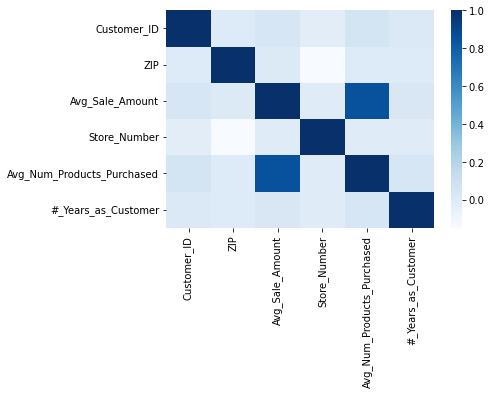

In [3]:
#check correlations to figure out which variable do we want to keep to run the linear regression model
corr = customers.corr()
display(corr)

#plot a heatmap
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns, cmap='Blues')

From the data above, we know that only Avg_Num_Products_Purchased has a high correlation with Avg_Sale_Amount. In this way, we will use Avg_Num_Products to calculate linear regression model. Also, the graph above didn't calculate categorical data. customers dataframe has Customer_Segment and Responded_to_Last_Catalog as categorical data. However, we don't have Responded_to_Last_Catalog column in the table we want to predict. In this way, we will only use Customer_Segment column to calculate linear regression formula. We will use dummy variable method to calculate this categorical data. In this way, first we need to change the column into different columns.

In [4]:
customers['Customer_Segment'].unique()

array(['Store Mailing List', 'Loyalty Club and Credit Card',
       'Loyalty Club Only', 'Credit Card Only'], dtype=object)

In [5]:
#Change categorical variable into different columns
customers['Store Mailing List'] = np.where(customers['Customer_Segment'] == 'Store Mailing List',1,0)
customers['Loyalty Club and Credit Card'] = np.where(customers['Customer_Segment'] == 'Loyalty Club and Credit Card',1,0)
customers['Loyalty Club Only'] = np.where(customers['Customer_Segment'] == 'Loyalty Club Only',1,0)
customers['Credit Card Only'] = np.where(customers['Customer_Segment'] == 'Credit Card Only',1,0)
customers

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer,Store Mailing List,Loyalty Club and Credit Card,Loyalty Club Only,Credit Card Only
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6,1,0,0,0
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6,1,0,0,0
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3,1,0,0,0
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,Yes,1,6,1,0,0,0
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,Yes,1,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2370,Joan Delisa,Credit Card Only,3287,1657 S King St,Denver,CO,80219,818.72,101,No,5,1,0,0,0,1
2371,Helen Cordiner,Credit Card Only,3299,2102 S Lansing Ct,Aurora,CO,80014,564.93,105,No,6,4,0,0,0,1
2372,Angela Finley,Credit Card Only,3303,1068 S Jasper St,Aurora,CO,80017,605.07,105,No,6,4,0,0,0,1
2373,Christine Sullivan,Credit Card Only,3304,7901 W 52nd Ave,Arvada,CO,80002,656.79,107,No,7,7,0,0,0,1


In [6]:
#drop the columns that we don't need in linear regression model
customers_after = customers.drop(['Name','Customer_ID','Customer_Segment','Address','City','State','ZIP','Store_Number','#_Years_as_Customer','Responded_to_Last_Catalog'],axis=1)
customers_after.head()

,Avg_Sale_Amount,Avg_Num_Products_Purchased,Store Mailing List,Loyalty Club and Credit Card,Loyalty Club Only,Credit Card Only
0,227.90,1,1,0,0,0
1,55.00,1,1,0,0,0
2,212.57,1,1,0,0,0
3,195.31,1,1,0,0,0
4,110.55,1,1,0,0,0


In [7]:
customers_after.describe()

,Avg_Sale_Amount,Avg_Num_Products_Purchased,Store Mailing List,Loyalty Club and Credit Card,Loyalty Club Only,Credit Card Only
count,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000
mean,399.774093,3.347368,0.466526,0.081684,0.243789,0.208000
std,340.115808,2.738568,0.498983,0.273941,0.429458,0.405962
min,1.220000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,168.925000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,281.320000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,572.400000,5.000000,1.000000,0.000000,0.000000,0.000000
max,2963.490000,26.000000,1.000000,1.000000,1.000000,1.000000


# Check for multicollinearity

,Avg_Sale_Amount,Avg_Num_Products_Purchased,Store Mailing List,Loyalty Club and Credit Card,Loyalty Club Only,Credit Card Only
Avg_Sale_Amount,1.000000,0.855754,-0.666655,0.591488,-0.005746,0.426358
Avg_Num_Products_Purchased,0.855754,1.000000,-0.636818,0.430441,0.055828,0.433220
Store Mailing List,-0.666655,-0.636818,1.000000,-0.278904,-0.530967,-0.479237
Loyalty Club and Credit Card,0.591488,0.430441,-0.278904,1.000000,-0.169340,-0.152842
Loyalty Club Only,-0.005746,0.055828,-0.530967,-0.169340,1.000000,-0.290975
Credit Card Only,0.426358,0.433220,-0.479237,-0.152842,-0.290975,1.000000


<AxesSubplot:>

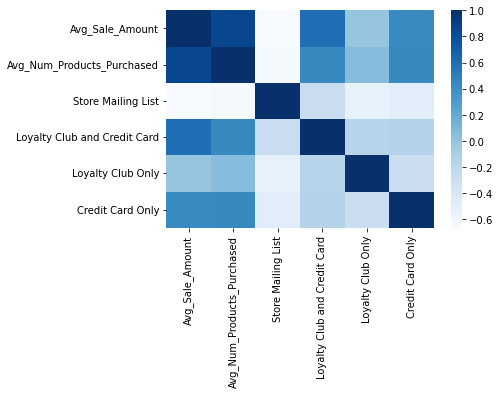

In [8]:
#print out a correlation matrix of customers_after
corr = customers_after.corr()
display(corr)

#plot a heatmap
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap='Blues')

# Build Multiple Linear Regression Model using Machine Learning

In [9]:
#split the data by defining the input variables and output variable
X = customers_after.drop('Avg_Sale_Amount',axis = 1)
Y = customers_after[['Avg_Sale_Amount']]

print(X.head())
print('-'*80)
print(Y.head())

   Avg_Num_Products_Purchased  Store Mailing List  \
0                           1                   1   
1                           1                   1   
2                           1                   1   
3                           1                   1   
4                           1                   1   

   Loyalty Club and Credit Card  Loyalty Club Only  Credit Card Only  
0                             0                  0                 0  
1                             0                  0                 0  
2                             0                  0                 0  
3                             0                  0                 0  
4                             0                  0                 0  
--------------------------------------------------------------------------------
   Avg_Sale_Amount
0           227.90
1            55.00
2           212.57
3           195.31
4           110.55


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression()

In [11]:
#grab the intercept and the coef
intercept = regression_model.intercept_[0]
intercept

289.8075462158944

In [12]:
print('The intercept for our model is {:.4}'.format(intercept))

The intercept for our model is 289.8


In [13]:
#loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print('The coefficient for {} is {:.4}'.format(coef[0],coef[1]))

The coefficient for Avg_Num_Products_Purchased is 62.74
The coefficient for Store Mailing List is -223.8
The coefficient for Loyalty Club and Credit Card is 308.2
The coefficient for Loyalty Club Only is -120.6
The coefficient for Credit Card Only is 36.28


#### The multiple linear regression formula is: Avg_Sale_amount = 289.8 + 62.74Avg_Num_Products_Purchased - 223.8(If store mailing list)+308.2(If loyalty club and credit card)-120.6(If loyalty club only)+36.28*(If credit card only)

# Verify the model

In [14]:
Y_predict = regression_model.predict(X_test)
Y_predict

array([[ 420.1433135 ],
       [ 128.74416024],
       [ 974.41858518],
       [ 231.91628333],
       [ 128.74416024],
       [ 545.62800029],
       [ 577.05927681],
       [ 482.8856569 ],
       [1099.90327196],
       [ 974.41858518],
       [ 482.8856569 ],
       [ 254.22884703],
       [ 191.48650363],
       [ 294.65862672],
       [ 128.74416024],
       [ 545.62800029],
       [ 974.41858518],
       [ 231.91628333],
       [ 231.91628333],
       [ 128.74416024],
       [ 128.74416024],
       [ 231.91628333],
       [ 294.65862672],
       [ 357.40097011],
       [ 639.8016202 ],
       [ 294.65862672],
       [ 128.74416024],
       [ 231.91628333],
       [ 420.1433135 ],
       [ 294.65862672],
       [ 911.67624179],
       [ 702.54396359],
       [ 765.28630699],
       [ 357.40097011],
       [ 482.8856569 ],
       [ 639.8016202 ],
       [1225.38795875],
       [ 128.74416024],
       [ 128.74416024],
       [ 128.74416024],
       [ 451.57459003],
       [ 128.744

In [15]:
#Define our input
X2 = sm.add_constant(X)
#create a OLS model
model = sm.OLS(Y,X2)
#fit the data
est=model.fit()

In [16]:
#make confidence intervals, 95% by default
est.conf_int()

,0,1
const,208.197314,232.170360
Avg_Num_Products_Purchased,64.005263,69.947147
Store Mailing List,-172.525225,-151.750994
Loyalty Club and Credit Card,345.797588,384.439211
Loyalty Club Only,-76.266158,-55.886017
Credit Card Only,70.874550,95.684719


Hypothesis testing 

Null hypothesis: there is no relationship between the variables selected and the sales amount 

Alternative hypotheiss: there is a relationship between the variables selected and the sales amount

In [17]:
#estimate the p-values.
est.pvalues

const                           5.381494e-227
Avg_Num_Products_Purchased      7.989877e-312
Store Mailing List              1.100780e-173
Loyalty Club and Credit Card    1.606332e-237
Loyalty Club Only                7.002317e-36
Credit Card Only                 2.981342e-38
dtype: float64

All the pvalues above are much smaller than 0.05 which means we reject the null hypothesis. The variables selected have relationship with the sale amount.

In [18]:
#calculate R-Squared
model_r2 = r2_score(Y_test,Y_predict)
print('R-Squared is {:.2}'.format(model_r2))

R-Squared is 0.85


In [19]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Avg_Sale_Amount   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     3040.
Date:                Thu, 17 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:44:50   Log-Likelihood:                -15061.
No. Observations:                2375   AIC:                         3.013e+04
Df Residuals:                    2370   BIC:                         3.016e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          220.1838      6.113     36.022      0.000     208.197     232.170
Avg_Num_Products_Purchased      66.9762      1.515     44.208      0.000      64.005      69.947
Store Mailing List            -162.1381      5.297    -30.610      0.000    -172.525    -151.751
Loyalty Club and Credit Card   365.1184      9.853     37.058      0.000     345.798     384.439
Loyalty Club Only              -66.0761      5.196    -12.716      0.000     -76.266     -55.886
Credit Card Only                83.2796      6.326     13.165      0.000      70.875      95.685
==============================================================================
Omnibus:                      359.638   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4770.580
Skew:                           0.232   Prob(JB):                         0.00
Kurtosis:                       9.928   Cond. No.                     4.30e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.5e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

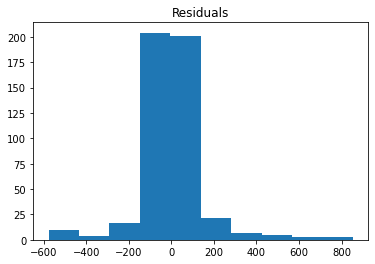

In [20]:
#plot the residuals
(Y_test - Y_predict).hist(grid=False)
plt.title('Residuals')
plt.show()

# Predicting Profit for New Customers

In [21]:
#import new customers file
new_customers = pd.read_excel('p1-mailinglist.xlsx',header=0)
new_customers

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706
...,...,...,...,...,...,...,...,...,...,...,...,...
245,Wanda Stiveson,Credit Card Only,1129,13080 W Montana Dr,Lakewood,CO,80228,107,18,0.3,0.783806,0.216194
246,Wendy Crenshaw,Loyalty Club Only,304,12483 W 8th Ave,Golden,CO,80401,106,3,0.6,0.807200,0.192800
247,Wendy Renaud,Loyalty Club Only,2629,700 S Alton Way,Denver,CO,80247,100,6,0.1,0.576544,0.423456
248,Wilma Reid,Credit Card Only,1917,6763 W Yale Ave,Lakewood,CO,80227,101,7,0.2,0.740749,0.259251


In [22]:
#Change customer segment into different columns
new_customers['Store Mailing List'] = np.where(new_customers['Customer_Segment'] == 'Store Mailing List',1,0)
new_customers['Loyalty Club and Credit Card'] = np.where(new_customers['Customer_Segment'] == 'Loyalty Club and Credit Card',1,0)
new_customers['Loyalty Club Only'] = np.where(new_customers['Customer_Segment'] == 'Loyalty Club Only',1,0)
new_customers['Credit Card Only'] = np.where(new_customers['Customer_Segment'] == 'Credit Card Only',1,0)
new_customers

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes,Store Mailing List,Loyalty Club and Credit Card,Loyalty Club Only,Credit Card Only
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036,0,0,1,0
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725,0,1,0,0
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882,0,0,1,0
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138,0,0,1,0
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Wanda Stiveson,Credit Card Only,1129,13080 W Montana Dr,Lakewood,CO,80228,107,18,0.3,0.783806,0.216194,0,0,0,1
246,Wendy Crenshaw,Loyalty Club Only,304,12483 W 8th Ave,Golden,CO,80401,106,3,0.6,0.807200,0.192800,0,0,1,0
247,Wendy Renaud,Loyalty Club Only,2629,700 S Alton Way,Denver,CO,80247,100,6,0.1,0.576544,0.423456,0,0,1,0
248,Wilma Reid,Credit Card Only,1917,6763 W Yale Ave,Lakewood,CO,80227,101,7,0.2,0.740749,0.259251,0,0,0,1


In [23]:
#Drop the columns we don't need
new_customers_after = new_customers.drop(['Name','Customer_Segment','Customer_ID','Address','City','State','ZIP','Store_Number','#_Years_as_Customer'],axis=1)
new_customers_after.head()

,Avg_Num_Products_Purchased,Score_No,Score_Yes,Store Mailing List,Loyalty Club and Credit Card,Loyalty Club Only,Credit Card Only
0,3,0.694964,0.305036,0,0,1,0
1,6,0.527275,0.472725,0,1,0,0
2,7,0.421118,0.578882,0,0,1,0
3,2,0.694862,0.305138,0,0,1,0
4,4,0.612294,0.387706,0,0,1,0


In [24]:
#Predict sales based on the linear regression formula and add a new column
new_customers_after['Predicted_Sales'] = 289.8 + 62.74*new_customers_after['Avg_Num_Products_Purchased'] - 223.8 *new_customers_after['Store Mailing List'] + 308.2*new_customers_after['Loyalty Club and Credit Card'] - 120.6*new_customers_after['Loyalty Club Only']+36.28*new_customers_after['Credit Card Only']
new_customers_after.head()

,Avg_Num_Products_Purchased,Score_No,Score_Yes,Store Mailing List,Loyalty Club and Credit Card,Loyalty Club Only,Credit Card Only,Predicted_Sales
0,3,0.694964,0.305036,0,0,1,0,357.42
1,6,0.527275,0.472725,0,1,0,0,974.44
2,7,0.421118,0.578882,0,0,1,0,608.38
3,2,0.694862,0.305138,0,0,1,0,294.68
4,4,0.612294,0.387706,0,0,1,0,420.16


In [25]:
#Use the Score_Yes column to predict the sales
new_customers_after['New_Predicted_Sales'] = new_customers_after['Predicted_Sales']*new_customers_after['Score_Yes']
new_customers_after.head()

,Avg_Num_Products_Purchased,Score_No,Score_Yes,Store Mailing List,Loyalty Club and Credit Card,Loyalty Club Only,Credit Card Only,Predicted_Sales,New_Predicted_Sales
0,3,0.694964,0.305036,0,0,1,0,357.42,109.025898
1,6,0.527275,0.472725,0,1,0,0,974.44,460.641698
2,7,0.421118,0.578882,0,0,1,0,608.38,352.180140
3,2,0.694862,0.305138,0,0,1,0,294.68,89.918010
4,4,0.612294,0.387706,0,0,1,0,420.16,162.898492


In [26]:
new_customers_after.describe()

,Avg_Num_Products_Purchased,Score_No,Score_Yes,Store Mailing List,Loyalty Club and Credit Card,Loyalty Club Only,Credit Card Only,Predicted_Sales,New_Predicted_Sales
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,4.672000,0.659332,0.340668,0.080000,0.104000,0.488000,0.328000,550.117120,187.809826
std,2.752949,0.190043,0.190044,0.271837,0.305873,0.500859,0.470427,278.584985,142.470739
min,1.000000,0.000002,0.185729,0.000000,0.000000,0.000000,0.000000,128.740000,25.300738
25%,3.000000,0.612926,0.210961,0.000000,0.000000,0.000000,0.000000,357.420000,96.021666
50%,5.000000,0.742010,0.257990,0.000000,0.000000,0.000000,0.000000,514.300000,143.370061
75%,6.000000,0.789039,0.387074,0.000000,0.000000,1.000000,1.000000,702.520000,235.260967
max,27.000000,0.814271,0.999998,1.000000,1.000000,1.000000,1.000000,2291.980000,790.102485


In [27]:
total_sales = new_customers_after['New_Predicted_Sales'].sum()
total_sales

46952.4566095738

In [28]:
total_cost = 6.50*250
total_cost

1625.0

In [29]:
gross_margin = 0.5*total_sales
gross_margin

23476.2283047869

In [30]:
profit = gross_margin - total_cost
profit

21851.2283047869